A Leading Bank wants a Model to be built to predict the Loan approval for a client based on a set of features. 

The Organization has engaged the services of Sai Science Pte Ltd for the same.


We will use Python to explore the data in order to gain a better understanding of the features and target variable. We will also analyze the data to summarize their main characteristics, using various visualization techniques.

In [1]:
#Import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import KFold
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from  sklearn import svm
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import average_precision_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from sklearn import model_selection
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Reading the training dataset in a dataframe using Pandas
df = pd.read_csv("train.csv")
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [3]:
test = pd.read_csv('test.csv')

In [4]:
test.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [5]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [6]:
print('shape of train is', df.shape)
print('shape of test is', test.shape)

shape of train is (614, 13)
shape of test is (367, 12)


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [8]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            367 non-null    object 
 1   Gender             356 non-null    object 
 2   Married            367 non-null    object 
 3   Dependents         357 non-null    object 
 4   Education          367 non-null    object 
 5   Self_Employed      344 non-null    object 
 6   ApplicantIncome    367 non-null    int64  
 7   CoapplicantIncome  367 non-null    int64  
 8   LoanAmount         362 non-null    float64
 9   Loan_Amount_Term   361 non-null    float64
 10  Credit_History     338 non-null    float64
 11  Property_Area      367 non-null    object 
dtypes: float64(3), int64(2), object(7)
memory usage: 34.5+ KB


Variables of Object data type 

In [9]:
df.select_dtypes("object").head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,Urban,Y
4,LP001008,Male,No,0,Graduate,No,Urban,Y


In [10]:
# variables of numeric data type
df.select_dtypes("number").head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
0,5849,0.0,NaN,360.0,1.0
1,4583,1508.0,128.0,360.0,1.0
2,3000,0.0,66.0,360.0,1.0
3,2583,2358.0,120.0,360.0,1.0
4,6000,0.0,141.0,360.0,1.0


In [11]:
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [12]:
list=df.columns
for i in range(len(list)):
    if(df[list[i]].isnull().sum()!=0):
        print('Percent of missing',list[i],'records is %.2f%%' %((df[list[i]].isnull().sum()/df.shape[0])*100))
    

Percent of missing Gender records is 2.12%
Percent of missing Married records is 0.49%
Percent of missing Dependents records is 2.44%
Percent of missing Self_Employed records is 5.21%
Percent of missing LoanAmount records is 3.58%
Percent of missing Loan_Amount_Term records is 2.28%
Percent of missing Credit_History records is 8.14%


Univariant Analysis (Examining each variable Individually)

In [13]:
# Target Variable
df['Loan_Status'].value_counts(normalize = True)  # Gives loan status in %

Y    0.687296
N    0.312704
Name: Loan_Status, dtype: float64

In [36]:
df['Loan_Status'].value_counts()

Y    422
N    192
Name: Loan_Status, dtype: int64

In [37]:
df.Gender.value_counts()

Male      489
Female    112
Name: Gender, dtype: int64

Visualizing Categorical Features.

Bar Plot is Best for Categorical Data

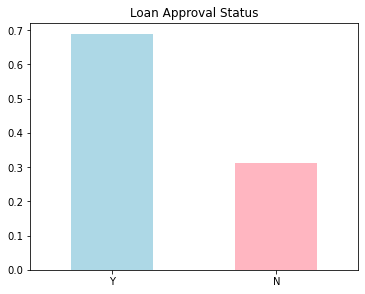

In [15]:
Color = ["lightblue", "lightpink"]
plt.subplot(231)
df['Loan_Status'].value_counts(normalize=True).plot.bar(figsize=(20,10), title= 'Loan Approval Status', color = Color)
plt.xticks(rotation = 0)
plt.show()


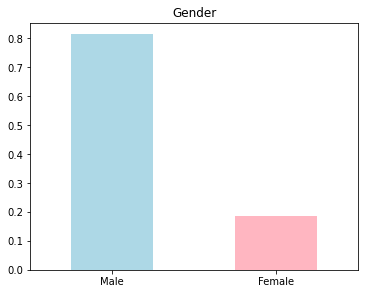

In [16]:
Color = ["lightblue", "lightpink"]
plt.subplot(231)
df['Gender'].value_counts(normalize=True).plot.bar(figsize=(20,10), title= 'Gender', color = Color)
plt.xticks(rotation = 0)
plt.show()


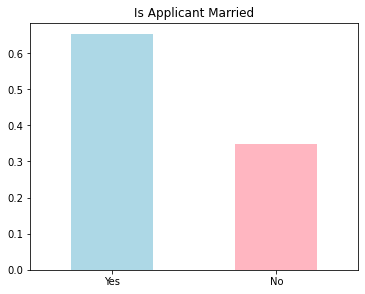

In [17]:
Color = ["lightblue", "lightpink"]
plt.subplot(231)
df['Married'].value_counts(normalize=True).plot.bar(figsize=(20,10), title= 'Is Applicant Married', color = Color)
plt.xticks(rotation = 0)
plt.show()


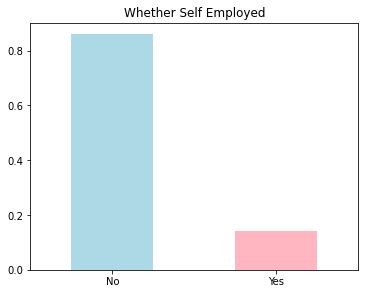

In [18]:
Color = ["lightblue", "lightpink"]
plt.subplot(231)
df['Self_Employed'].value_counts(normalize=True).plot.bar(figsize=(20,10),title= 'Whether Self Employed', color = Color)
plt.xticks(rotation = 0)
plt.show()


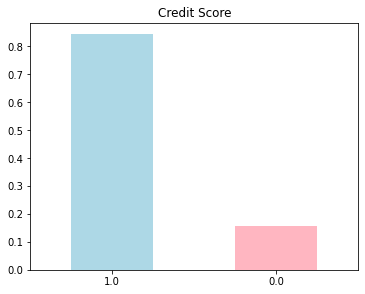

In [19]:
Color = ["lightblue", "lightpink"]
plt.subplot(231)
df['Credit_History'].value_counts(normalize=True).plot.bar(figsize=(20,10),title= 'Credit Score', color = Color)
plt.xticks(rotation = 0)
plt.show()

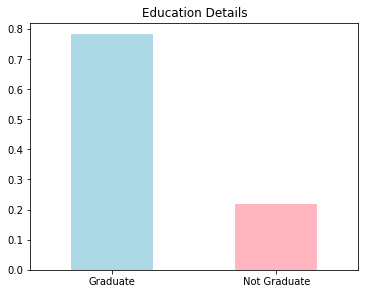

In [20]:
Color = ["lightblue", "lightpink"]
plt.subplot(231)
df['Education'].value_counts(normalize=True).plot.bar(figsize=(20,10),title= 'Education Details', color = Color)
plt.xticks(rotation = 0)
plt.show()

Conclusions :

1) Around 69% or Applicants get Approvals for Loan.
2) More than 80% Applicants are Male.
3) Almost 65% Applicants are Married.
4) More than 15% Applicants are Self Employed.
5) More than 80% Applicants have a Good Credit Score.
6) close to 80% Applicants are Graduate.

Plots for Independent Ordinal Variables

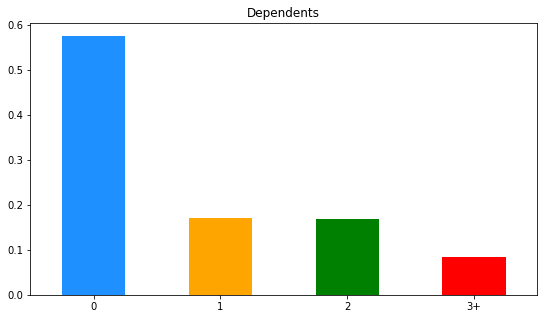

In [21]:

plt.figure(1)
plt.subplot(121)

Color1 = ["dodgerblue", "orange", "green", "red"]

Color2 = ["dodgerblue", "red", "green"]

df['Dependents'].value_counts(normalize=True).plot.bar(figsize=(20,5), title= 'Dependents', color = Color1)
plt.xticks(rotation = 0)


plt.show()

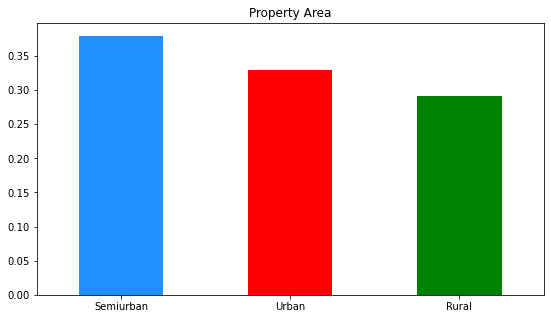

In [22]:
plt.figure(1)
plt.subplot(121)

Color1 = ["dodgerblue", "orange", "green", "red"]

Color2 = ["dodgerblue", "red", "green"]
df['Property_Area'].value_counts(normalize=True).plot.bar(figsize=(20,5),title= 'Property Area', color = Color2)
plt.xticks(rotation = 0)

plt.show()

Conclusions :

1) Maximum Number of the Applicants don't have Dependents.
2) Mostly Applicants are from Semi Urban and Urban.

Plot for Independent Numerical Variables

Measures of Central Tendency : 
Mean of Applicant Income : 5403.46
Median of Applicant Income : 3812.50

Measure of Variability :
Standard Deviation of Applicant Income : 6109.04

Kurtosis of Applicant Income : 60.54


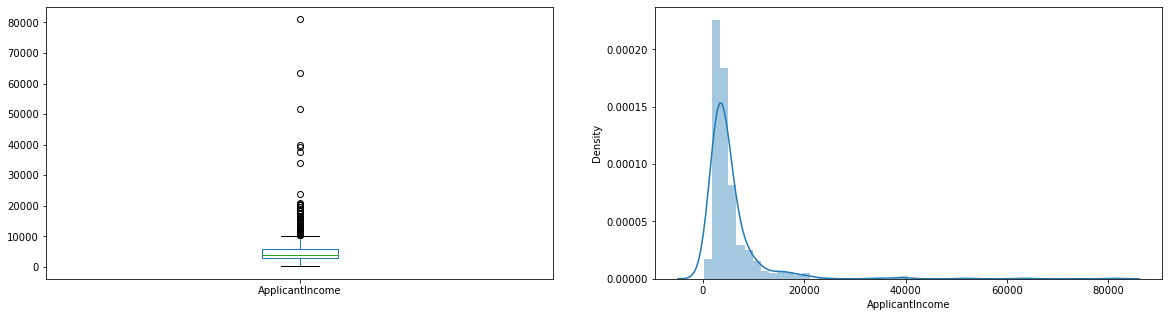

In [23]:

plt.figure(1)

plt.subplot(121)
df["ApplicantIncome"].plot.box(figsize = (20,5))

plt.subplot(122)
sns.distplot(df["ApplicantIncome"]);

print(f"Measures of Central Tendency : ")
print(f"Mean of Applicant Income : {df['ApplicantIncome'].mean():.2f}")
print(f"Median of Applicant Income : {df['ApplicantIncome'].median():.2f}")

print()

print(f"Measure of Variability :")
print(f"Standard Deviation of Applicant Income : {df['ApplicantIncome'].std():.2f}")

print()

print(f"Kurtosis of Applicant Income : {df['ApplicantIncome'].kurtosis():.2f}")


Distribution of Data is more Towards Left, Distribution is Right Skewed. (Positive Skewness)

Algorithm Works Better if the Data is Normally Distributed.

Data is Heavily Tailed : Histogram and Kernel Density Plot is Best Way to Represent Kurtosis.

The Boxplots Represents the Presence of Outliers Values, Data contains many Outliers.

For Better Observation

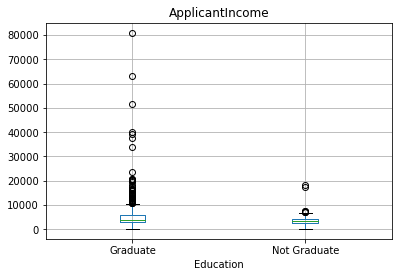

In [24]:
df.boxplot(column='ApplicantIncome',by='Education')
plt.suptitle("")
plt.show()

Graduates have high Income

Coapplicant Income Distribution

Measures of Central Tendency : 
Mean of Coapplicant Income : 1621.25
Median of Coapplicant Income : 1188.50

Measure of Variability :
Standard Deviation of Coapplicant Income : 2926.25

Kurtosis of Coapplicant Income : 84.96


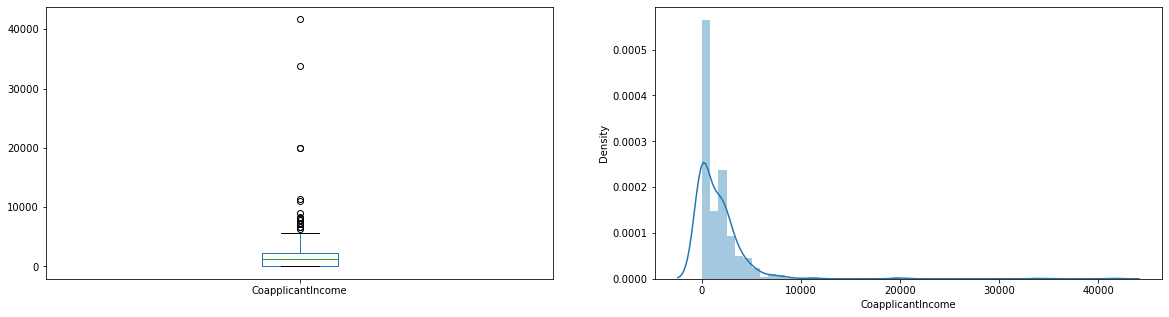

In [25]:
plt.figure(1)

plt.subplot(121)
df["CoapplicantIncome"].plot.box(figsize = (20,5))

plt.subplot(122)
sns.distplot(df["CoapplicantIncome"]);

print(f"Measures of Central Tendency : ")
print(f"Mean of Coapplicant Income : {df['CoapplicantIncome'].mean():.2f}")
print(f"Median of Coapplicant Income : {df['CoapplicantIncome'].median():.2f}")

print()

print(f"Measure of Variability :")
print(f"Standard Deviation of Coapplicant Income : {df['CoapplicantIncome'].std():.2f}")

print()

print(f"Kurtosis of Coapplicant Income : {df['CoapplicantIncome'].kurtosis():.2f}")


Coapplicant Income is Right Skewed and consist lots of Outliers.

Plotting of Loan Amount

Measures of Central Tendency : 
Mean of Loan Amount : 146.41
Median of Loan Amount : 128.00

Measure of Variability :
Standard Deviation of Loan Amount : 85.59

Kurtosis of Loan Amount : 10.40


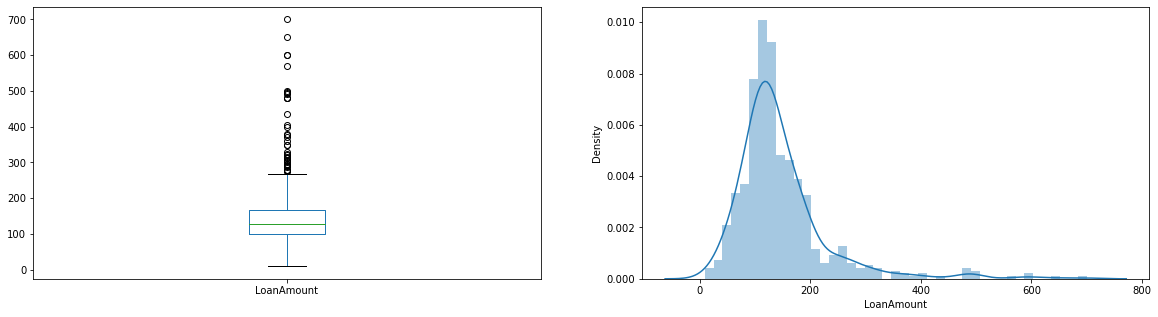

In [26]:
plt.figure(1)

plt.subplot(121)
df["LoanAmount"].plot.box(figsize = (20,5))

plt.subplot(122)
sns.distplot(df["LoanAmount"]);

print(f"Measures of Central Tendency : ")
print(f"Mean of Loan Amount : {df['LoanAmount'].mean():.2f}")
print(f"Median of Loan Amount : {df['LoanAmount'].median():.2f}")

print()

print(f"Measure of Variability :")
print(f"Standard Deviation of Loan Amount : {df['LoanAmount'].std():.2f}")

print()

print(f"Kurtosis of Loan Amount : {df['LoanAmount'].kurtosis():.2f}")

Loan Amount Term

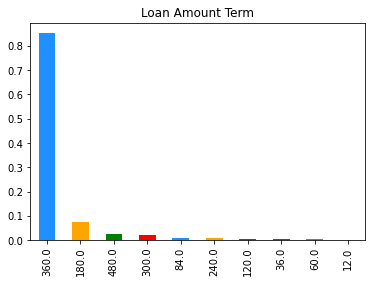

In [27]:
df["Loan_Amount_Term"].value_counts(normalize = True).plot.bar(title = "Loan Amount Term", color = Color1);

Around 85% of Loans are of 360 Months (30 Years)

Categorical Independent Variable Vs Target Variable

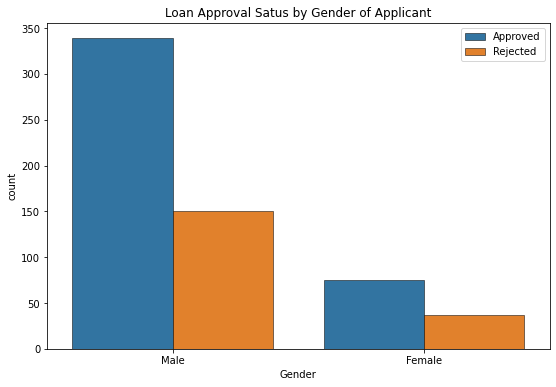

In [46]:
#Loan Approval Status based on Gender
plt.figure(figsize=(9, 6))
ax=sns.countplot(data=df,
                 x = 'Gender',
                 hue = 'Loan_Status', #-This parameter takes column name for Colour encoding
                 edgecolor=(0,0,0),
                 linewidth=0.5)
plt.title('Loan Approval Satus by Gender of Applicant')
plt.legend(['Approved','Rejected'])
plt.show()

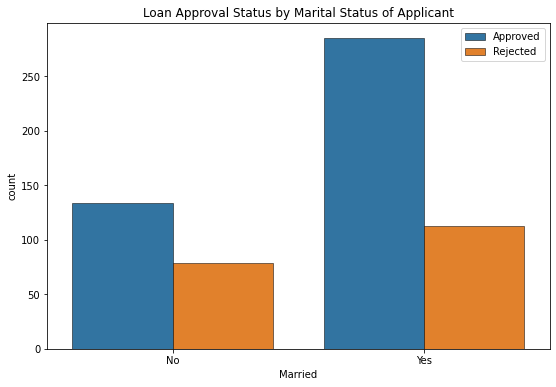

In [47]:
#Loan Approval Status based on Marital Status
plt.figure(figsize=(9, 6))
ax=sns.countplot(data=df,
                 x = 'Married',
                 hue = 'Loan_Status', #-This parameter takes column name for Colour encoding
                 edgecolor=(0,0,0),
                 linewidth=0.5)
plt.title('Loan Approval Status by Marital Status of Applicant')
plt.legend(['Approved','Rejected'])
plt.show()

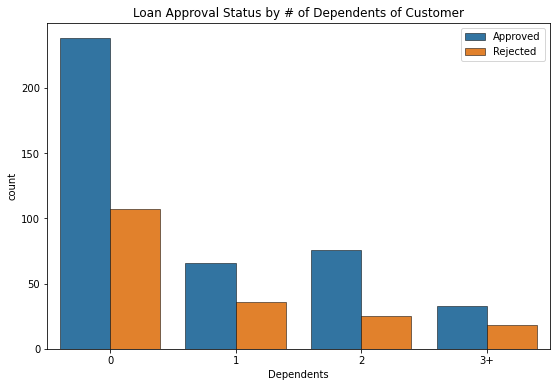

In [48]:
#Loan Approval Status based on # of Dependents of Customer
plt.figure(figsize=(9, 6))
ax=sns.countplot(data=df,
                 x = 'Dependents',
                 hue = 'Loan_Status', #-This parameter takes column name for Colour encoding
                 edgecolor=(0,0,0),
                 linewidth=0.5)
plt.title('Loan Approval Status by # of Dependents of Customer')
plt.legend(['Approved','Rejected'])
plt.show()

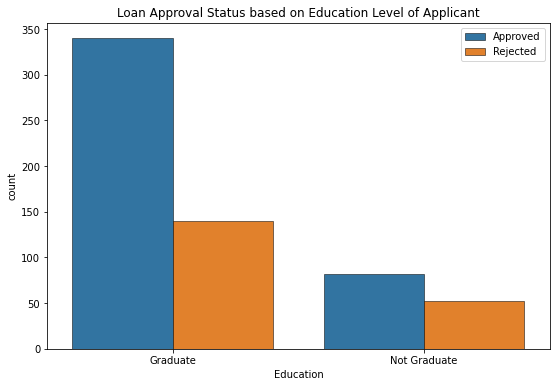

In [49]:
#Loan Approval Status based on Education Level of Applicant
plt.figure(figsize=(9, 6))
ax=sns.countplot(data=df,
                 x = 'Education',
                 hue = 'Loan_Status', #-This parameter takes column name for Colour encoding
                 edgecolor=(0,0,0),
                 linewidth=0.5)
plt.title('Loan Approval Status based on Education Level of Applicant')
plt.legend(['Approved','Rejected'])
plt.show()

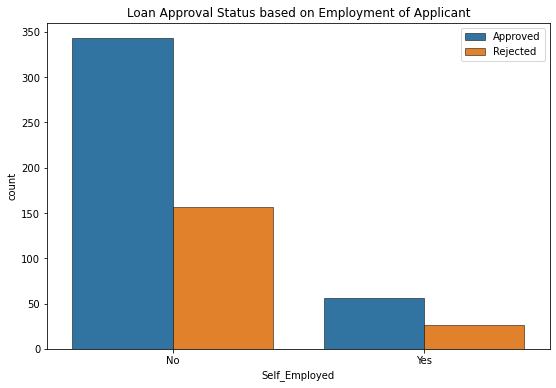

In [50]:
#Loan Approval Status based on Employment of Applicant
plt.figure(figsize=(9, 6))
ax=sns.countplot(data=df,
                 x = 'Self_Employed',
                 hue = 'Loan_Status', #-This parameter takes column name for Colour encoding
                 edgecolor=(0,0,0),
                 linewidth=0.5)
plt.title('Loan Approval Status based on Employment of Applicant')
plt.legend(['Approved','Rejected'])
plt.show()

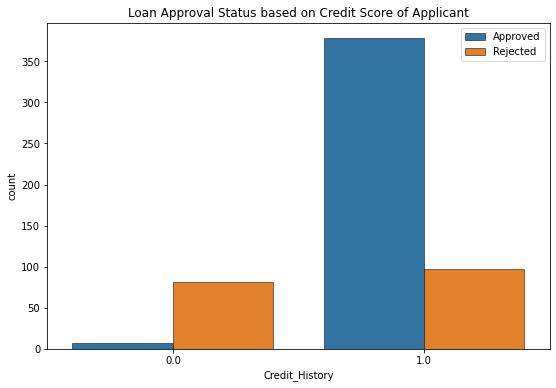

In [51]:
#Loan Approval Status based on Credit Score of Applicant
plt.figure(figsize=(9, 6))
ax=sns.countplot(data=df,
                 x = 'Credit_History',
                 hue = 'Loan_Status', #-This parameter takes column name for Colour encoding
                 edgecolor=(0,0,0),
                 linewidth=0.5)
plt.title('Loan Approval Status based on Credit Score of Applicant')
plt.legend(['Approved','Rejected'])
plt.show()

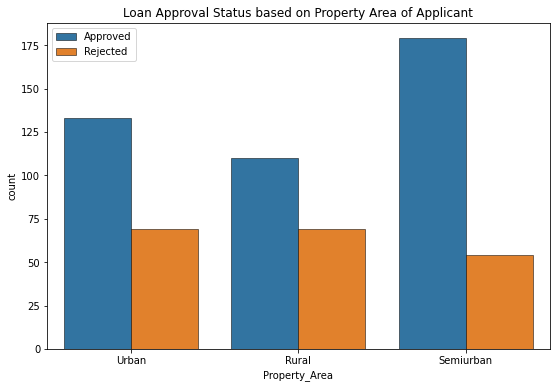

In [52]:
#Loan Approval Status based on Property Area of Applicant
plt.figure(figsize=(9, 6))
ax=sns.countplot(data=df,
                 x = 'Property_Area',
                 hue = 'Loan_Status', #-This parameter takes column name for Colour encoding
                 edgecolor=(0,0,0),
                 linewidth=0.5)
plt.title('Loan Approval Status based on Property Area of Applicant')
plt.legend(['Approved','Rejected'])
plt.show()

Change the 3+ in dependents variable to 3 to make it a numerical variable.We will also convert the target variable’s categories into 0 and 1

In [53]:
df['Dependents'].replace('3+', 3,inplace=True) 

In [54]:
test['Dependents'].replace('3+', 3,inplace=True)

Convert the target variable 'Loan Status' categories into 0 and 1 for logistic regression

In [55]:
df['Loan_Status'].replace('N', 0,inplace=True) 
df['Loan_Status'].replace('Y', 1,inplace=True)

Correlation using Heatmaps

In [56]:
df.corr()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status
ApplicantIncome,1.000000,-0.116605,0.570909,-0.045306,-0.014715,-0.004710
CoapplicantIncome,-0.116605,1.000000,0.188619,-0.059878,-0.002056,-0.059187
LoanAmount,0.570909,0.188619,1.000000,0.039447,-0.008433,-0.037318
Loan_Amount_Term,-0.045306,-0.059878,0.039447,1.000000,0.001470,-0.021268
Credit_History,-0.014715,-0.002056,-0.008433,0.001470,1.000000,0.561678
Loan_Status,-0.004710,-0.059187,-0.037318,-0.021268,0.561678,1.000000


In [57]:
print(df['Loan_Status'].value_counts())

1    422
0    192
Name: Loan_Status, dtype: int64


Heat Map for Checking Correlation 

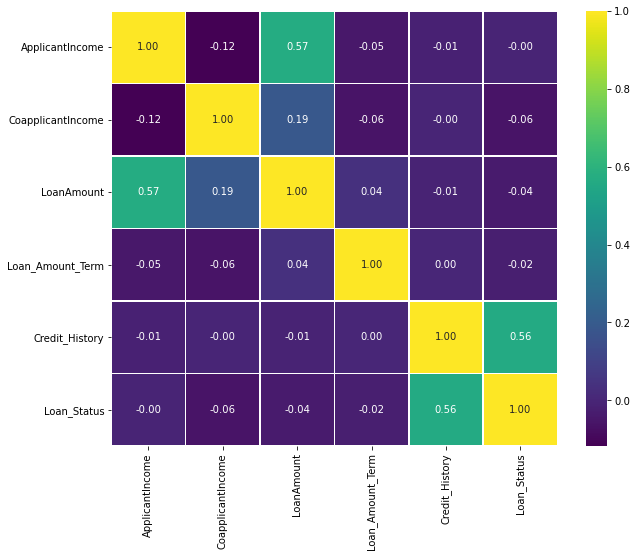

In [58]:
Fig, Axes = plt.subplots(figsize = (10,8))
Axes = sns.heatmap(df.corr(), annot = True, linewidths = 0.5, fmt = '.2f', cmap = 'viridis');


Better Correlations :

Applicant Income and Loan Amount.
Credit History and Loan Status.

# Data Pre-processing 

In [59]:
#Check missing values
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [60]:
test.isnull().sum()

Loan_ID               0
Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64

Based on the assessment of the missing values in the dataset, We will make the following changes to the data:

->If "Gender" is missing for a given row, we will impute with Male (most common answer).  
->If "Married" is missing for a given row, we will impute with yes (most common answer).  
->If "Dependents" is missing for a given row, we will impute with 0 (most common answer).  
->If "Self_Employed" is missing for a given row, we will impute with no (most common answer).  
->If "LoanAmount" is missing for a given row, we will impute with mean of data.  
->If "Loan_Amount_Term" is missing for a given row, we will impute with 360 (most common answer).  
->If "Credit_History" is missing for a given row, we will impute with 1.0 (most common answer).  

In [61]:
train_df = df.copy()
train_df['Gender'].fillna(train_df['Gender'].value_counts().idxmax(), inplace=True)
train_df['Married'].fillna(train_df['Married'].value_counts().idxmax(), inplace=True)
train_df['Dependents'].fillna(train_df['Dependents'].value_counts().idxmax(), inplace=True)
train_df['Self_Employed'].fillna(train_df['Self_Employed'].value_counts().idxmax(), inplace=True)
train_df["LoanAmount"].fillna(train_df["LoanAmount"].mean(skipna=True), inplace=True)
train_df['Loan_Amount_Term'].fillna(train_df['Loan_Amount_Term'].value_counts().idxmax(), inplace=True)
train_df['Credit_History'].fillna(train_df['Credit_History'].value_counts().idxmax(), inplace=True)
train_df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,1
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,0
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,1
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,1
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,1


In [62]:
test_df = test.copy()
test_df['Gender'].fillna(test_df['Gender'].value_counts().idxmax(), inplace=True)
test_df['Married'].fillna(test_df['Married'].value_counts().idxmax(), inplace=True)
test_df['Dependents'].fillna(test_df['Dependents'].value_counts().idxmax(), inplace=True)
test_df['Self_Employed'].fillna(test_df['Self_Employed'].value_counts().idxmax(), inplace=True)
test_df["LoanAmount"].fillna(test_df["LoanAmount"].mean(skipna=True), inplace=True)
test_df['Loan_Amount_Term'].fillna(test_df['Loan_Amount_Term'].value_counts().idxmax(), inplace=True)
test_df['Credit_History'].fillna(test_df['Credit_History'].value_counts().idxmax(), inplace=True)
test_df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,1.0,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [63]:
#Check missing values
train_df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [64]:
test_df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
dtype: int64

In [65]:
test_df['Dependents'].replace('3+', 3,inplace=True)

In [66]:

print(train_df['Loan_Amount_Term'].value_counts())

360.0    526
180.0     44
480.0     15
300.0     13
84.0       4
240.0      4
120.0      3
36.0       2
60.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64



Here also Count of Loan Amount Terms of 36 Months is More than other Terms.

Replacing Missing Values with Mode : 360 Months (30 Years)

In [67]:
train_df['Loan_Amount_Term'].fillna(train_df['Loan_Amount_Term'].mode()[0], inplace = True)
test_df['Loan_Amount_Term'].fillna(test_df['Loan_Amount_Term'].mode()[0], inplace = True)


Loan Amount is a Numerical Data : Imputing Missing Data Values with the Median of Loan Amounts.

In [68]:
train_df['LoanAmount'].fillna(train_df['LoanAmount'].median(), inplace = True)
test_df['LoanAmount'].fillna(test_df['LoanAmount'].median(), inplace = True)

In [69]:
print(f"Train Set : \n{train_df.isnull().sum()}")
print()
print(f"Test Set : \n{test_df.isnull().sum()}")

Train Set : 
Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

Test Set : 
Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
dtype: int64


Outlier Treatment
Major Outliers where Observed above in Applicant Income, Coapplicant Income and The Loan Amount.

Outliers where Clearly Visible in Histogram above.

Outliers in the Data Set Often Affects the Mean and Standard Deviation by affecting the Distribution of Data.

More Data is Present on Left and Long Tail is on Right. (Right Skewed : Positive Skewed)

One Way to Remove Skewness is to Perform Log Transformation.

Log Transformation does not Affect the Smaller Values but Reduces the Larger Values, so we get Similar to Normal Distribution.

Before Log Transformation :

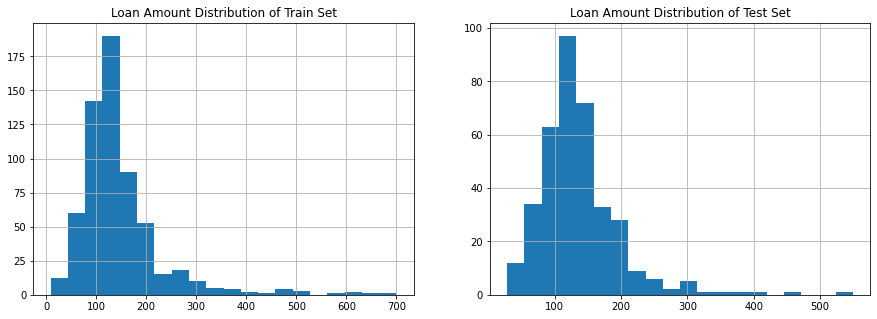

In [70]:

plt.subplot(121)
train_df["LoanAmount"].hist(figsize = (15,5), bins = 20)
plt.title('Loan Amount Distribution of Train Set')

plt.subplot(122)
test_df['LoanAmount'].hist(bins = 20)
plt.title('Loan Amount Distribution of Test Set');

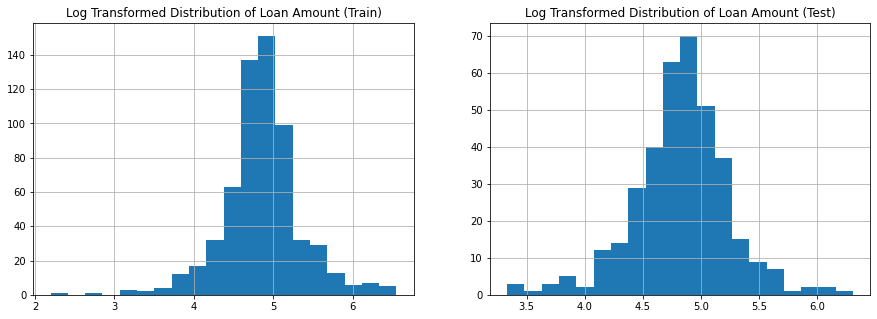

In [71]:
# After Log Transformation


plt.subplot(121)
np.log(train_df['LoanAmount']).hist(figsize = (15,5), bins = 20)
plt.title(f'Log Transformed Distribution of Loan Amount (Train)')
plt.subplot(122)
np.log(test_df['LoanAmount']).hist(bins = 20)
plt.title(f'Log Transformed Distribution of Loan Amount (Test)');


Now the Distribution Looks Little Bit Close to the Normal Distribution


# Encoding Categorical Features.

In [72]:
# Loan id is of no use
train_df.drop('Loan_ID', axis = 'columns', inplace = True)
test_df.drop('Loan_ID', axis = 'columns', inplace = True)

In [73]:
# splitting data in to features and Target variables

X = train_df.drop('Loan_Status', axis = 'columns')
Y = train_df['Loan_Status']

Creating Dummy Variables for Categorical Values.

Dummy Variables turns Categorical Variabes into a Series of 0 and 1, making them Easier to Quantify and Compare.

In [74]:
X = pd.get_dummies(X, drop_first = True)
train_df_encoded = pd.get_dummies(train_df,drop_first=True)
test_df_encoded = pd.get_dummies(test_df,drop_first=True)
train_df_encoded.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,Gender_Male,Married_Yes,Dependents_0,Dependents_1,Dependents_2,Education_Not Graduate,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban
0,5849,0.0,146.412162,360.0,1.0,1,1,0,1,0,0,0,0,0,1
1,4583,1508.0,128.000000,360.0,1.0,0,1,1,0,1,0,0,0,0,0
2,3000,0.0,66.000000,360.0,1.0,1,1,1,1,0,0,0,1,0,1
3,2583,2358.0,120.000000,360.0,1.0,1,1,1,1,0,0,1,0,0,1
4,6000,0.0,141.000000,360.0,1.0,1,1,0,1,0,0,0,0,0,1


In [75]:
X.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Male,Married_Yes,Dependents_0,Dependents_1,Dependents_2,Education_Not Graduate,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban
0,5849,0.0,146.412162,360.0,1.0,1,0,1,0,0,0,0,0,1
1,4583,1508.0,128.000000,360.0,1.0,1,1,0,1,0,0,0,0,0
2,3000,0.0,66.000000,360.0,1.0,1,1,1,0,0,0,1,0,1
3,2583,2358.0,120.000000,360.0,1.0,1,1,1,0,0,1,0,0,1
4,6000,0.0,141.000000,360.0,1.0,1,0,1,0,0,0,0,0,1


# Model Development and Evaluation

In [76]:
train_df_encoded.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,Gender_Male,Married_Yes,Dependents_0,Dependents_1,Dependents_2,Education_Not Graduate,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban
0,5849,0.0,146.412162,360.0,1.0,1,1,0,1,0,0,0,0,0,1
1,4583,1508.0,128.000000,360.0,1.0,0,1,1,0,1,0,0,0,0,0
2,3000,0.0,66.000000,360.0,1.0,1,1,1,1,0,0,0,1,0,1
3,2583,2358.0,120.000000,360.0,1.0,1,1,1,1,0,0,1,0,0,1
4,6000,0.0,141.000000,360.0,1.0,1,1,0,1,0,0,0,0,0,1


In [77]:
########## Split Features and Target Varible ############
X = train_df_encoded.drop(columns='Loan_Status')
Y = train_df_encoded['Loan_Status']

In [78]:

from sklearn.model_selection import train_test_split
X_Train, X_Valid, Y_Train, Y_Valid = train_test_split(X, Y, test_size = 0.3, random_state = 42)

In [79]:

print(f'70 % of Train Set Dimension : {len(X_Train)} and its Traget Variables Dimension : {len(Y_Train)}')
print(f'30 % of Valid Set Dimension : {len(X_Valid)} and its Target Variables Dimension : {len(Y_Valid)}')

70 % of Train Set Dimension : 429 and its Traget Variables Dimension : 429
30 % of Valid Set Dimension : 185 and its Target Variables Dimension : 185


In [80]:
kfold = model_selection.KFold(n_splits = 10)

In [81]:
#Variable to save the result and show it
classifier = ('Logistic Regression','Decision Tree','Gradient Boosting','Random Forest','K-Nearest Neighbor','SVM')
y_pos = np.arange(len(classifier))
score = []

In [82]:
from sklearn.linear_model import LogisticRegression 
from sklearn.metrics import accuracy_score
model = LogisticRegression() 
model.fit(X_Train, Y_Train)
scores = cross_val_score(model, X_Valid, Y_Valid, cv = kfold)
results = cross_val_score(model, X_Valid, Y_Valid, cv = kfold)
print('Logistic Regression, Cross-Validation mean: %.4f' % results.mean())
print("%0.2f Logistic Rgeression accuracy with a standard deviation of %0.2f" % (results.mean(), results.std()))
score.append(scores.mean())

Logistic Regression, Cross-Validation mean: 0.7789
0.78 Logistic Rgeression accuracy with a standard deviation of 0.09


In [83]:
pred = model.predict(X_Valid)
print(f'Accuracy Score of Logistic Regression Model : {accuracy_score(Y_Valid, pred):.2f}%')

Accuracy Score of Logistic Regression Model : 0.76%


In [84]:
from sklearn.model_selection import KFold
kfold = KFold(n_splits = 10)
cart = DecisionTreeClassifier()
cart.fit(X_Train, Y_Train)
scores = cross_val_score(cart, X_Valid, Y_Valid, cv = kfold)
results = cross_val_score(cart, X_Valid, Y_Valid, cv = kfold)
print('Decision Tree, Cross-Validation mean: %.4f' % results.mean())
print("%0.2f Decision Tree accuracy with a standard deviation of %0.2f" % (results.mean(), results.std()))
score.append(scores.mean())

Decision Tree, Cross-Validation mean: 0.6865
0.69 Decision Tree accuracy with a standard deviation of 0.11


In [85]:
pred = cart.predict(X_Valid)
print(f'Accuracy Score of Decission Tree Model : {accuracy_score(Y_Valid, pred):.2f}%')

Accuracy Score of Decission Tree Model : 0.70%


In [86]:
gbc = GradientBoostingClassifier()
gbc.fit(X_Train, Y_Train)
scores = cross_val_score(gbc, X_Valid, Y_Valid, cv = kfold)
results = cross_val_score(gbc, X_Valid, Y_Valid, cv = kfold)
print('Gradient Boosting, Cross-Validation mean: %.4f' % results.mean())
print("%0.2f Gradient Boosting accuracy with a standard deviation of %0.2f" % (results.mean(), results.std()))
score.append(scores.mean())
#print('The accuracy of classification is %.2f%%' %(scores.mean()*100))

Gradient Boosting, Cross-Validation mean: 0.7409
0.74 Gradient Boosting accuracy with a standard deviation of 0.09


In [87]:
pred = gbc.predict(X_Valid)
print(f'Accuracy Score of Gradient Boosting Model : {accuracy_score(Y_Valid, pred):.2f}%')

Accuracy Score of Gradient Boosting Model : 0.74%


In [88]:
RFC = RandomForestClassifier(n_estimators=100,max_depth=3)
RFC.fit(X_Train, Y_Train)
scores = cross_val_score(RFC, X_Valid, Y_Valid, cv = kfold)
results = cross_val_score(RFC, X_Valid, Y_Valid, cv = kfold)
print('Ranfom Forest, Cross-Validation mean: %.4f' % results.mean())
print("%0.2f Random Forest accuracy with a standard deviation of %0.2f" % (results.mean(), results.std()))
score.append(scores.mean())
#print('The accuracy of classification is %.2f%%' %(scores.mean()*100))

Ranfom Forest, Cross-Validation mean: 0.8067
0.81 Random Forest accuracy with a standard deviation of 0.10


In [89]:
pred = RFC.predict(X_Valid)
print(f'Accuracy Score of Random Forest Model : {accuracy_score(Y_Valid, pred):.2f}%')

Accuracy Score of Random Forest Model : 0.78%


In [90]:
KNN = KNeighborsClassifier()
KNN.fit(X_Train, Y_Train)
scores = cross_val_score(KNN, X_Valid, Y_Valid, cv = kfold)
results = cross_val_score(KNN, X_Valid, Y_Valid, cv = kfold)
print('K Nearest Neighbour, Cross-Validation mean: %.4f' % results.mean())
print("%0.2f K Nearest Neighbour accuracy with a standard deviation of %0.2f" % (results.mean(), results.std()))
score.append(scores.mean())
#print('The accuracy of classification is %.2f%%' %(scores.mean()*100))

K Nearest Neighbour, Cross-Validation mean: 0.6170
0.62 K Nearest Neighbour accuracy with a standard deviation of 0.13


In [91]:
pred = KNN.predict(X_Valid)
print(f'Accuracy Score of KNN Model : {accuracy_score(Y_Valid, pred):.2f}%')

Accuracy Score of KNN Model : 0.56%


In [94]:
SVC = svm.SVC()
SVC.fit(X_Train, Y_Train)
scores = cross_val_score(SVC, X_Valid, Y_Valid, cv = kfold)
results = cross_val_score(SVC, X_Valid, Y_Valid, cv = kfold)
print('SVC Cross-Validation mean: %.4f' % results.mean())
print("%0.2f SVC accuracy with a standard deviation of %0.2f" % (results.mean(), results.std()))
score.append(scores.mean())
#print('The accuracy of classification is %.2f%%' %(scores.mean()*100))

SVC Cross-Validation mean: 0.6500
0.65 SVC accuracy with a standard deviation of 0.15


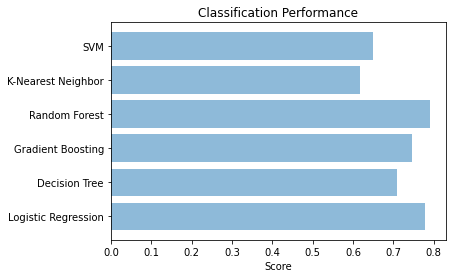

In [95]:
plt.barh(y_pos, score, align='center', alpha=0.5)
plt.yticks(y_pos, classifier)
plt.xlabel('Score')
plt.title('Classification Performance')
plt.show()

As we can see random forset performs best based on the cross_val_score and Accuracy Score. therefore we will se it predict the test case.

Lets analyze other parameters like ACCURACY, PRECISION, RECALL, Confusion Matrix etc for all the above classifiers

Below is a function to calculate the above parameters for the different models used 

In [110]:
def show_summary_report(actual, prediction):

    if isinstance(actual, pd.Series):
        actual = actual.values
    if actual.dtype.name == 'object':
        actual = actual.astype(int)
    if prediction.dtype.name == 'object':
        prediction = prediction.astype(int)

    accuracy_ = accuracy_score(actual, prediction)
    precision_ = precision_score(actual, prediction)
    recall_ = recall_score(actual, prediction)
    #roc_auc_ = roc_auc_score(actual, probabilities[:, 1])

    print('Accuracy : %.4f [TP / N] Proportion of predicted labels that match the true labels. Best: 1, Worst: 0' % accuracy_)
    print('Precision: %.4f [TP / (TP + FP)] Not to label a negative sample as positive.        Best: 1, Worst: 0' % precision_)
    print('Recall   : %.4f [TP / (TP + FN)] Find all the positive samples.                     Best: 1, Worst: 0' % recall_)
   # print('ROC AUC  : %.4f                                                                     Best: 1, Worst: < 0.5' % roc_auc_)
    print('-' * 107)
    print('TP: True Positives, FP: False Positives, TN: True Negatives, FN: False Negatives, N: Number of samples')

    # Confusion Matrix
    mat = confusion_matrix(actual, prediction)

    # Precision/Recall
    precision, recall, _ = precision_recall_curve(actual, prediction)
    average_precision = average_precision_score(actual, prediction)
    '''
    # Compute ROC curve and ROC area
    fpr, tpr, _ = roc_curve(actual, probabilities[:, 1])
    roc_auc = auc(fpr, tpr)
    '''
    # plot
    fig, ax = plt.subplots(1, 2, figsize = (15, 6))
    fig.subplots_adjust(left = 0.02, right = 0.98, wspace = 0.2)

    # Confusion Matrix
    sns.heatmap(mat.T, square = True, annot = True, fmt = 'd', cbar = False, cmap = 'Blues', ax = ax[0])

    ax[0].set_title('Confusion Matrix')
    ax[0].set_xlabel('True label')
    ax[0].set_ylabel('Predicted label')
    
    # Precision/Recall
    step_kwargs = {'step': 'post'}
    ax[1].step(recall, precision, color = 'b', alpha = 0.2, where = 'post')
    ax[1].fill_between(recall, precision, alpha = 0.2, color = 'b', **step_kwargs)
    ax[1].set_ylim([0.0, 1.0])
    ax[1].set_xlim([0.0, 1.0])
    ax[1].set_xlabel('Recall')
    ax[1].set_ylabel('Precision')
    ax[1].set_title('2-class Precision-Recall curve')

    # ROC
    '''
    ax[2].plot(fpr, tpr, color = 'darkorange', lw = 2, label = 'ROC curve (AUC = %0.2f)' % roc_auc)
    ax[2].plot([0, 1], [0, 1], color = 'navy', lw = 2, linestyle = '--')
    ax[2].set_xlim([0.0, 1.0])
    ax[2].set_ylim([0.0, 1.0])
    ax[2].set_xlabel('False Positive Rate')
    ax[2].set_ylabel('True Positive Rate')
    ax[2].set_title('Receiver Operating Characteristic')
    ax[2].legend(loc = 'lower right')
    '''
    
    plt.show()
    
    return (accuracy_, precision_, recall_)

***********************
* Logistic Regression *
***********************
Accuracy : 0.7622 [TP / N] Proportion of predicted labels that match the true labels. Best: 1, Worst: 0
Precision: 0.7346 [TP / (TP + FP)] Not to label a negative sample as positive.        Best: 1, Worst: 0
Recall   : 0.9917 [TP / (TP + FN)] Find all the positive samples.                     Best: 1, Worst: 0
-----------------------------------------------------------------------------------------------------------
TP: True Positives, FP: False Positives, TN: True Negatives, FN: False Negatives, N: Number of samples


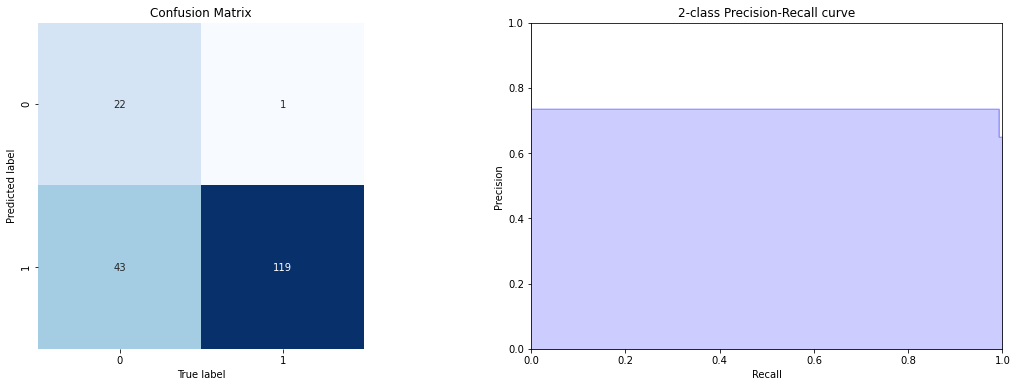


*****************
* Decision Tree *
*****************
Accuracy : 0.7027 [TP / N] Proportion of predicted labels that match the true labels. Best: 1, Worst: 0
Precision: 0.7444 [TP / (TP + FP)] Not to label a negative sample as positive.        Best: 1, Worst: 0
Recall   : 0.8250 [TP / (TP + FN)] Find all the positive samples.                     Best: 1, Worst: 0
-----------------------------------------------------------------------------------------------------------
TP: True Positives, FP: False Positives, TN: True Negatives, FN: False Negatives, N: Number of samples


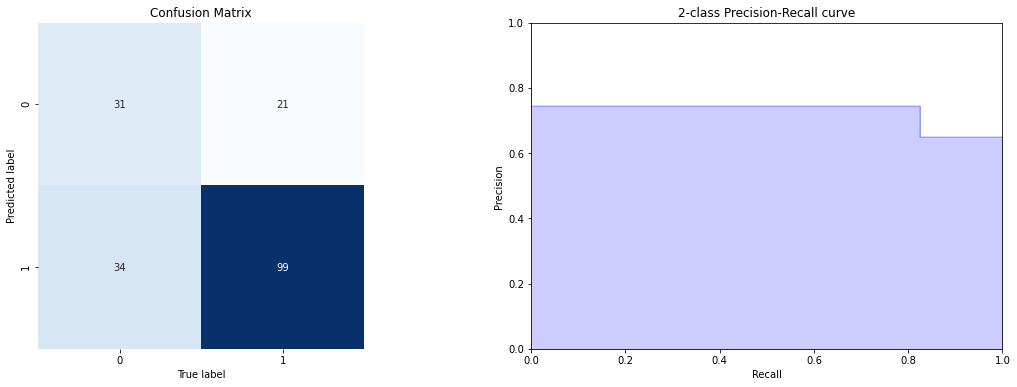


******************
* Gradient Boost *
******************
Accuracy : 0.7351 [TP / N] Proportion of predicted labels that match the true labels. Best: 1, Worst: 0
Precision: 0.7320 [TP / (TP + FP)] Not to label a negative sample as positive.        Best: 1, Worst: 0
Recall   : 0.9333 [TP / (TP + FN)] Find all the positive samples.                     Best: 1, Worst: 0
-----------------------------------------------------------------------------------------------------------
TP: True Positives, FP: False Positives, TN: True Negatives, FN: False Negatives, N: Number of samples


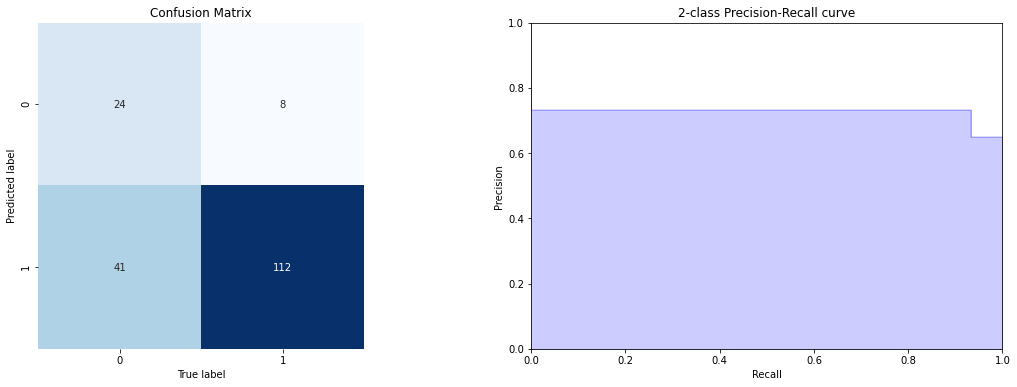


*****************
* Random Forest *
*****************
Accuracy : 0.7838 [TP / N] Proportion of predicted labels that match the true labels. Best: 1, Worst: 0
Precision: 0.7564 [TP / (TP + FP)] Not to label a negative sample as positive.        Best: 1, Worst: 0
Recall   : 0.9833 [TP / (TP + FN)] Find all the positive samples.                     Best: 1, Worst: 0
-----------------------------------------------------------------------------------------------------------
TP: True Positives, FP: False Positives, TN: True Negatives, FN: False Negatives, N: Number of samples


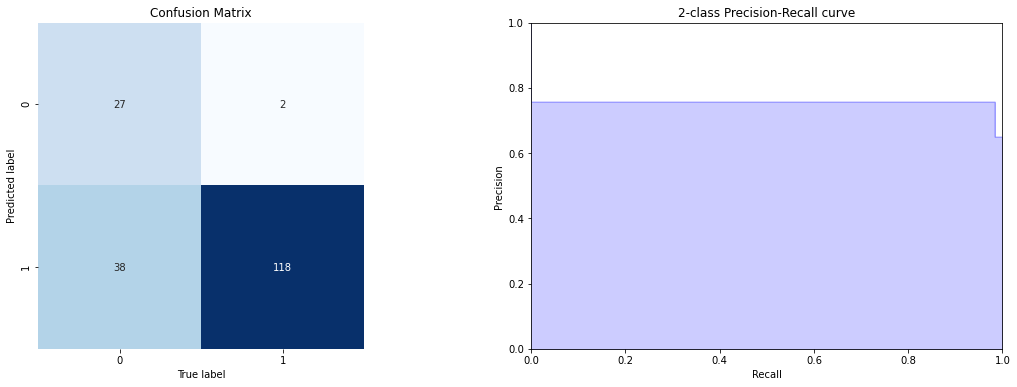


*******
* KNN *
*******
Accuracy : 0.5622 [TP / N] Proportion of predicted labels that match the true labels. Best: 1, Worst: 0
Precision: 0.6275 [TP / (TP + FP)] Not to label a negative sample as positive.        Best: 1, Worst: 0
Recall   : 0.8000 [TP / (TP + FN)] Find all the positive samples.                     Best: 1, Worst: 0
-----------------------------------------------------------------------------------------------------------
TP: True Positives, FP: False Positives, TN: True Negatives, FN: False Negatives, N: Number of samples


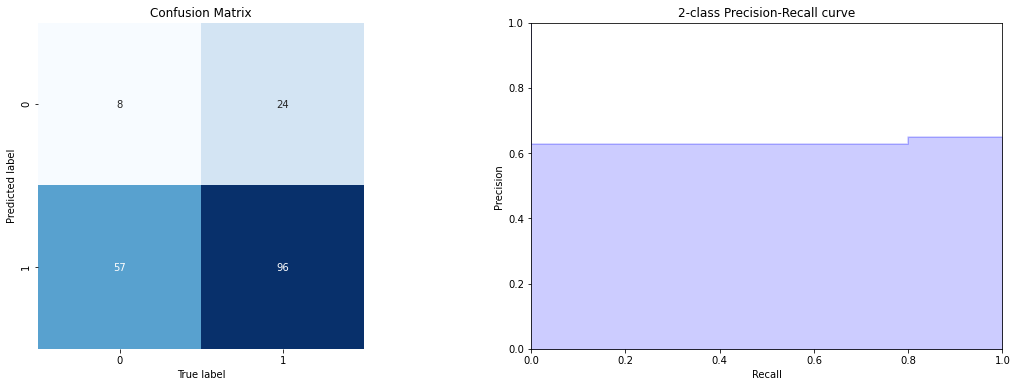


*******
* SVM *
*******
Accuracy : 0.6486 [TP / N] Proportion of predicted labels that match the true labels. Best: 1, Worst: 0
Precision: 0.6486 [TP / (TP + FP)] Not to label a negative sample as positive.        Best: 1, Worst: 0
Recall   : 1.0000 [TP / (TP + FN)] Find all the positive samples.                     Best: 1, Worst: 0
-----------------------------------------------------------------------------------------------------------
TP: True Positives, FP: False Positives, TN: True Negatives, FN: False Negatives, N: Number of samples


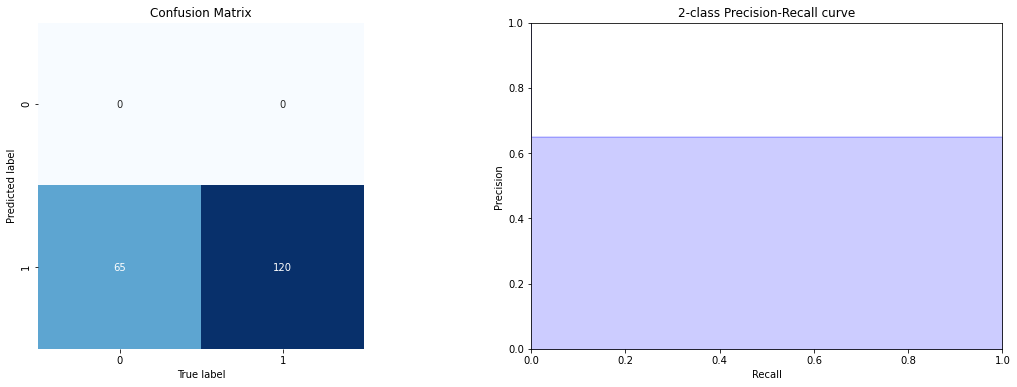

In [111]:
# Keep the results in a dataframe
results = pd.DataFrame(columns = ['Model', 'Accuracy', 'Precision', 'Recall'])

models = ['Logistic Regression','Decision Tree','Gradient Boost','Random Forest','KNN','SVM']
for i, m in enumerate([model,cart,gbc,RFC,KNN,SVC]):
    print('*' * (len(models[i]) + 4))
    print('* %s *' % models[i])
    print('*' * (len(models[i]) + 4))
    predictions = m.predict(X_Valid)
    #probabilities = m.predict_proba(X_Valid)
    # show the report
    accuracy_, precision_, recall_ = show_summary_report(Y_Valid, predictions)
    # keep the results
    results.loc[i] = {'Model': models[i], 
                      'Accuracy': accuracy_, 
                      'Precision': precision_,
                      'Recall': recall_
                      #'ROC_AUC': roc_auc_
                     }
    print()
    
    

In [112]:
results

,Model,Accuracy,Precision,Recall
0,Logistic Regression,0.762162,0.734568,0.991667
1,Decision Tree,0.702703,0.744361,0.825000
2,Gradient Boost,0.735135,0.732026,0.933333
3,Random Forest,0.783784,0.756410,0.983333
4,KNN,0.562162,0.627451,0.800000
5,SVM,0.648649,0.648649,1.000000


Now predict on the test data


In [113]:
test_df_encoded.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Male,Married_Yes,Dependents_0,Dependents_1,Dependents_2,Education_Not Graduate,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban
0,5720,0,110.0,360.0,1.0,1,1,1,0,0,0,0,0,1
1,3076,1500,126.0,360.0,1.0,1,1,0,1,0,0,0,0,1
2,5000,1800,208.0,360.0,1.0,1,1,0,0,1,0,0,0,1
3,2340,2546,100.0,360.0,1.0,1,1,0,0,1,0,0,0,1
4,3276,0,78.0,360.0,1.0,1,0,1,0,0,1,0,0,1


In [114]:
test_df_encoded.isnull().sum()

ApplicantIncome            0
CoapplicantIncome          0
LoanAmount                 0
Loan_Amount_Term           0
Credit_History             0
Gender_Male                0
Married_Yes                0
Dependents_0               0
Dependents_1               0
Dependents_2               0
Education_Not Graduate     0
Self_Employed_Yes          0
Property_Area_Semiurban    0
Property_Area_Urban        0
dtype: int64

In [115]:
test_df_encoded.dtypes

ApplicantIncome              int64
CoapplicantIncome            int64
LoanAmount                 float64
Loan_Amount_Term           float64
Credit_History             float64
Gender_Male                  uint8
Married_Yes                  uint8
Dependents_0                 uint8
Dependents_1                 uint8
Dependents_2                 uint8
Education_Not Graduate       uint8
Self_Employed_Yes            uint8
Property_Area_Semiurban      uint8
Property_Area_Urban          uint8
dtype: object

In [116]:
test.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


 Making Prediction

In [117]:
yhat_test=RFC.predict(test_df_encoded)
yhat_prob=RFC.predict_proba(test_df_encoded)
yhat_test

array([1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0,
       1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,

In [118]:
df1 = pd.DataFrame(yhat_test)
df1.columns=['Loan_Status']

## CONVERTING 0,1 INTO Y,N:


df1.Loan_Status.replace(0,'N',inplace=True)
df1.Loan_Status.replace(1,'Y',inplace=True)
df1.head()

,Loan_Status
0,Y
1,Y
2,Y
3,Y
4,Y


In [119]:
pred = pd.concat([test, df1], axis = 1)

#pred.columns=['Loan_ID', 'gender', 'married', 'dependents', 'edu', 'employment', 'income','coincome', 'loan', 'term', 'credit', 'area', 'Loan_Status']

pred.index=pred.Loan_ID
#pred=pred[['Loan_Status']]


pred.to_csv('prediction.csv')

In [120]:
predict_test = pd.read_csv('prediction.csv')

In [121]:
predict_test.head()

,Loan_ID,Loan_ID.1,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001015,LP001015,Male,Yes,0.0,Graduate,No,5720,0,110.0,360.0,1.0,Urban,Y
1,LP001022,LP001022,Male,Yes,1.0,Graduate,No,3076,1500,126.0,360.0,1.0,Urban,Y
2,LP001031,LP001031,Male,Yes,2.0,Graduate,No,5000,1800,208.0,360.0,1.0,Urban,Y
3,LP001035,LP001035,Male,Yes,2.0,Graduate,No,2340,2546,100.0,360.0,NaN,Urban,Y
4,LP001051,LP001051,Male,No,0.0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban,Y
